In [53]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import eikon as ek  # the Eikon Python wrapper package

key = "15761635c53f4e348a80931bd61ac7885548ffab"

ek.set_app_key(key)


import numpy as np  # NumPy
import pandas as pd  # pandas
import configparser as cp

import sys



import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)

import quandl

import argparse
import logging




# Step one: get information from Refintiv through excel add-on
#data consists of 19 assets from the past year for the BID price
project= pd.read_excel('FX-final.xlsx')
project


,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,1.0,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,1.0,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,1.0,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,1.0,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,1.0,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.30147,0.37744,0.38530,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,0.30147,0.37744,0.38530,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,0.30140,0.37701,0.38509,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,0.30148,0.37711,0.38504,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# check nan & null value
project.isna().sum(axis = 0)

KWD=       0
BHD=       0
OMR=       0
JOD=       0
GBP=     104
KYD=     104
EUR=     104
CHF=     104
BSD=     104
BMD=     104
PAB=     104
CAD=     104
SGD=     104
BND.O    112
AUD=     104
NZD=     104
BGN=     104
FJD=     104
BRL=     104
dtype: int64

In [55]:

project.isnull().sum(axis = 0)

KWD=       0
BHD=       0
OMR=       0
JOD=       0
GBP=     104
KYD=     104
EUR=     104
CHF=     104
BSD=     104
BMD=     104
PAB=     104
CAD=     104
SGD=     104
BND.O    112
AUD=     104
NZD=     104
BGN=     104
FJD=     104
BRL=     104
dtype: int64

In [56]:
#not to take away unknown data
df=project.dropna()
df


,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,1.0,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,1.0,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,1.0,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,1.0,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,1.0,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.30121,0.37705,0.38531,0.71,1.3889,0.835,1.2068,0.9074,1.0,1.0,1.0,1.2152,1.3337,85.39,0.7781,0.7236,1.6211,0.4984,5.2766
250,0.30121,0.37747,0.38531,0.71,1.3907,0.835,1.2007,0.9132,1.0,1.0,1.0,1.2268,1.3356,85.43,0.7749,0.7217,1.6292,0.4971,5.3557
251,0.30120,0.37714,0.38509,0.71,1.3888,0.835,1.2017,0.9139,1.0,1.0,1.0,1.2311,1.3366,85.44,0.7707,0.7146,1.6278,0.4889,5.4456
252,0.30110,0.37705,0.38508,0.71,1.3913,0.835,1.2065,0.9113,1.0,1.0,1.0,1.2280,1.3298,85.40,0.7763,0.7200,1.6278,0.4975,5.4452


In [57]:
#much better
df.isnull().sum(axis = 0)


KWD=     0
BHD=     0
OMR=     0
JOD=     0
GBP=     0
KYD=     0
EUR=     0
CHF=     0
BSD=     0
BMD=     0
PAB=     0
CAD=     0
SGD=     0
BND.O    0
AUD=     0
NZD=     0
BGN=     0
FJD=     0
BRL=     0
dtype: int64

In [58]:
df.isna().sum(axis = 0)

KWD=     0
BHD=     0
OMR=     0
JOD=     0
GBP=     0
KYD=     0
EUR=     0
CHF=     0
BSD=     0
BMD=     0
PAB=     0
CAD=     0
SGD=     0
BND.O    0
AUD=     0
NZD=     0
BGN=     0
FJD=     0
BRL=     0
dtype: int64

In [59]:
df.to_csv('FX_finalclean.csv')
project=pd.read_csv('FX_finalclean.csv') # we need to use the delete function because it gave is an unknown column 
del project['Unnamed: 0']
project

,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,1.0,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,1.0,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,1.0,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,1.0,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,1.0,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.30121,0.37705,0.38531,0.71,1.3889,0.835,1.2068,0.9074,1.0,1.0,1.0,1.2152,1.3337,85.39,0.7781,0.7236,1.6211,0.4984,5.2766
250,0.30121,0.37747,0.38531,0.71,1.3907,0.835,1.2007,0.9132,1.0,1.0,1.0,1.2268,1.3356,85.43,0.7749,0.7217,1.6292,0.4971,5.3557
251,0.30120,0.37714,0.38509,0.71,1.3888,0.835,1.2017,0.9139,1.0,1.0,1.0,1.2311,1.3366,85.44,0.7707,0.7146,1.6278,0.4889,5.4456
252,0.30110,0.37705,0.38508,0.71,1.3913,0.835,1.2065,0.9113,1.0,1.0,1.0,1.2280,1.3298,85.40,0.7763,0.7200,1.6278,0.4975,5.4452


In [60]:
key = "d3fa9214f08547e183467c15838ab44380c80ae0"

ek.set_app_key(key)
 
    

In [45]:
data_FX = [
     'KWD=',
     'BHD=',
     'OMR=',
     'JOD=',
     'GBP=',
     'KYD=',
     'EUR=',
     'CHF=',
     'BSD=',
     'BMD=',
     'PAB=',
     'CAD=',
     'SGD=',
     'BND.O',
     'AUD=',
     'NZD=',
     'BGN=',
     'FJD=',
     'BRL='
 ]


In [47]:
import sqlite3    

conn = sqlite3.connect('clean_data_FX.db') #Opens Connection to SQLite database file.
tables = ""
tablesName = ""
val=""
for i in ( data_FX ):
    tables += "'"+i+"'"+" nvarchar(5),"
    tablesName += "'"+i+"',"
    val += "?,"
    
conn.execute("CREATE TABLE cleandata("+tables[:-1]+");") #Creates the table
for i in range(0,len(project)):
    conn.execute( "INSERT INTO cleandata ( "+tablesName[:-1]+") VALUES("+val[:-1]+")", project.iloc[i] )
    
conn.commit() # Commits the entries to the database
conn.close()



In [61]:
df2, err = ek.get_data(data_FX,
                      [ "TR.ASKPRICE"], 
                      {"SDate":"2022-04-20","EDate":"2021-04-20"})
                       
df2

,Instrument,Ask Price
0,KWD=,0.30565
1,KWD=,0.30581
2,KWD=,0.30553
3,KWD=,0.3053
4,KWD=,0.3055
...,...,...
5381,BRL=,5.437
5382,BRL=,5.4776
5383,BRL=,5.4454
5384,BRL=,5.57


In [62]:
df3=df2['Instrument']
df3.unique()


<StringArray>
[ 'KWD=',  'BHD=',  'OMR=',  'JOD=',  'GBP=',  'KYD=',  'EUR=',  'CHF=',
  'BSD=',  'BMD=',  'PAB=',  'CAD=',  'SGD=', 'BND.O',  'AUD=',  'NZD=',
  'BGN=',  'FJD=',  'BRL=']
Length: 19, dtype: string

In [63]:
#The two dates match up but one is in a different format as the other. Lets see if
#the first few lines match 
test=df2['Ask Price'][1:30]
test2=project['KWD='][1:30]

test, test2

(1     0.30581
 2     0.30553
 3      0.3053
 4      0.3055
 5      0.3055
 6      0.3053
 7      0.3053
 8     0.30521
 9     0.30523
 10     0.3049
 11    0.30534
 12    0.30534
 13    0.30501
 14    0.30513
 15    0.30492
 16    0.30455
 17     0.3042
 18     0.3045
 19     0.3045
 20     0.3041
 21      0.304
 22     0.3044
 23     0.3047
 24     0.3043
 25     0.3044
 26     0.3044
 27    0.30446
 28    0.30441
 29      0.304
 Name: Ask Price, dtype: Float64,
 1     0.30581
 2     0.30553
 3     0.30530
 4     0.30550
 5     0.30550
 6     0.30530
 7     0.30530
 8     0.30521
 9     0.30523
 10    0.30490
 11    0.30534
 12    0.30534
 13    0.30501
 14    0.30513
 15    0.30492
 16    0.30455
 17    0.30420
 18    0.30450
 19    0.30450
 20    0.30410
 21    0.30400
 22    0.30440
 23    0.30470
 24    0.30430
 25    0.30440
 26    0.30440
 27    0.30446
 28    0.30441
 29    0.30400
 Name: KWD=, dtype: float64)

In [65]:
#the information is not perfect. but with the information we can 
#see that the FX KWD has the same results for both of the charts. 

project

,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,1.0,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,1.0,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,1.0,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,1.0,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,1.0,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.30121,0.37705,0.38531,0.71,1.3889,0.835,1.2068,0.9074,1.0,1.0,1.0,1.2152,1.3337,85.39,0.7781,0.7236,1.6211,0.4984,5.2766
250,0.30121,0.37747,0.38531,0.71,1.3907,0.835,1.2007,0.9132,1.0,1.0,1.0,1.2268,1.3356,85.43,0.7749,0.7217,1.6292,0.4971,5.3557
251,0.30120,0.37714,0.38509,0.71,1.3888,0.835,1.2017,0.9139,1.0,1.0,1.0,1.2311,1.3366,85.44,0.7707,0.7146,1.6278,0.4889,5.4456
252,0.30110,0.37705,0.38508,0.71,1.3913,0.835,1.2065,0.9113,1.0,1.0,1.0,1.2280,1.3298,85.40,0.7763,0.7200,1.6278,0.4975,5.4452


In [66]:
two=['KWD=', 'AUD=' ]
data_2= project[two]
data_2.describe()


,KWD=,AUD=
count,254.000000,254.000000
mean,0.302694,0.737388
std,0.001187,0.019400
min,0.300550,0.698800
25%,0.301870,0.722725
50%,0.302725,0.735150
75%,0.303315,0.748650
max,0.305810,0.784600


In [143]:
?adfuller


In [67]:
var_list=two

for i in var_list:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(data_2[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(data_2[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
KWD= in Level 
 ADF Stat (Library) for KWD= : -1.72 
 ADF P-Val (Library) KWD= : 0.08 

KWD= in 1st Difference 
 ADF Stat (Library) for KWD= : -13.84 
 ADF P-Val (Library) KWD= : 0.00 

Number of lags used: 2
KWD= in Level 
 ADF Stat (Library) for KWD= : -1.82 
 ADF P-Val (Library) KWD= : 0.07 

KWD= in 1st Difference 
 ADF Stat (Library) for KWD= : -11.45 
 ADF P-Val (Library) KWD= : 0.00 

____________________________________________ 

Number of lags used: 1
AUD= in Level 
 ADF Stat (Library) for AUD= : 0.49 
 ADF P-Val (Library) AUD= : 0.82 

AUD= in 1st Difference 
 ADF Stat (Library) for AUD= : -12.31 
 ADF P-Val (Library) AUD= : 0.00 

Number of lags used: 2
AUD= in Level 
 ADF Stat (Library) for AUD= : 0.57 
 ADF P-Val (Library) AUD= : 0.84 

AUD= in 1st Difference 
 ADF Stat (Library) for AUD= : -10.62 
 ADF P-Val (Library) AUD= : 0.00 

____________________________________________ 



In [68]:
#using our data we can run a test to find the P-values of the currencies for two different lags 
var_list= data_FX
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(project[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(project[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Prices (Level)
KWD= : 0.08
BHD= : 0.71
OMR= : 0.69
JOD= : 0.68
GBP= : 0.90
KYD= : 0.68
EUR= : 0.98
CHF= : 0.41
BSD= : nan
BMD= : nan
PAB= : nan
CAD= : 0.53
SGD= : 0.39
BND.O : 0.99
AUD= : 0.82
NZD= : 0.86
BGN= : 0.07
FJD= : 0.85
BRL= : 0.91
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
KWD= : 0.07
BHD= : 0.72
OMR= : 0.69
JOD= : 0.68
GBP= : 0.91
KYD= : 0.68
EUR= : 0.98
CHF= : 0.45
BSD= : nan
BMD= : nan
PAB= : nan
CAD= : 0.52
SGD= : 0.42
BND.O : 1.00
AUD= : 0.84
NZD= : 0.87
BGN= : 0.05
FJD= : 0.90
BRL= : 0.90
____________________________________________ 



In [69]:
# we will now also test for stionarity in first difference in two lags 

for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in var_list:
        adf_library = adfuller(project[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(project[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')
    

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
KWD= : 0.00
BHD= : 0.00
OMR= : 0.00
JOD= : 0.00
GBP= : 0.00
KYD= : 0.00
EUR= : 0.00
CHF= : 0.00
BSD= : nan
BMD= : nan
PAB= : nan
CAD= : 0.00
SGD= : 0.00
BND.O : 0.00
AUD= : 0.00
NZD= : 0.00
BGN= : 0.00
FJD= : 0.00
BRL= : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
KWD= : 0.00
BHD= : 0.00
OMR= : 0.00
JOD= : 0.00
GBP= : 0.00
KYD= : 0.00
EUR= : 0.00
CHF= : 0.00
BSD= : nan
BMD= : nan
PAB= : nan
CAD= : 0.00
SGD= : 0.00
BND.O : 0.00
AUD= : 0.00
NZD= : 0.00
BGN= : 0.00
FJD= : 0.00
BRL= : 0.00
____________________________________________ 



In [70]:

#lets take the observations for the last 30 days to test for stationarity again using a different method 

n_obs=30
project_train, project_test = project[0:-n_obs], project[-n_obs:]
print(project_train.shape, project_test.shape)

(224, 19) (30, 19)


In [42]:
project_transform=project_train.diff().dropna()
project_transform.head()


,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
1,0.00016,-0.00003,0.00000,0.0,-0.0068,0.0,-0.0064,0.0034,0.0,0.0,0.0,0.0117,0.0041,-0.47,-0.0080,-0.0069,0.0111,-0.0029,0.0455
2,-0.00028,0.00003,0.00001,0.0,0.0014,0.0,-0.0006,-0.0069,0.0,0.0,0.0,-0.0001,-0.0061,0.47,-0.0021,-0.0001,0.0010,-0.0031,-0.0135
3,-0.00023,-0.00001,-0.00004,0.0,0.0046,0.0,0.0026,-0.0022,0.0,0.0,0.0,-0.0004,-0.0053,0.23,0.0048,0.0031,-0.0054,0.0069,0.0425
4,0.00020,0.00008,0.00026,0.0,0.0006,0.0,0.0020,-0.0005,0.0,0.0,0.0,-0.0012,-0.0002,0.59,0.0021,0.0022,-0.0028,0.0000,0.0061
5,0.00000,0.00000,0.00000,0.0,0.0051,0.0,0.0059,-0.0075,0.0,0.0,0.0,-0.0033,0.0060,-0.15,0.0033,0.0007,-0.0105,-0.0036,-0.0106


In [151]:
project_transform.describe()

,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
count,223.000000,2.230000e+02,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.0,223.0,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,-0.000021,-1.345291e-07,2.242152e-07,0.000000,0.000466,0.000000,0.000563,-0.000226,0.0,0.0,0.0,-0.000154,-0.000170,0.037578,0.000115,0.000144,-0.000839,0.000082,0.002225
std,0.000234,2.893733e-05,1.398469e-04,0.000336,0.005476,0.000949,0.004629,0.003748,0.0,0.0,0.0,0.005604,0.003023,0.264121,0.004015,0.003766,0.006981,0.002642,0.050443
min,-0.000760,-1.200000e-04,-3.100000e-04,-0.001900,-0.012400,-0.005000,-0.017500,-0.010700,0.0,0.0,0.0,-0.017100,-0.009100,-0.610000,-0.009400,-0.008700,-0.022000,-0.008000,-0.151100
25%,-0.000160,-1.000000e-05,-1.000000e-05,0.000000,-0.003200,0.000000,-0.001700,-0.002600,0.0,0.0,0.0,-0.004200,-0.002300,-0.150000,-0.002750,-0.002700,-0.004000,-0.001300,-0.030950
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000300,0.000000,0.000600,-0.000200,0.0,0.0,0.0,0.000100,-0.000200,0.020000,-0.000200,0.000000,-0.000800,0.000000,0.000000
75%,0.000100,1.000000e-05,0.000000e+00,0.000000,0.003700,0.000000,0.002900,0.002200,0.0,0.0,0.0,0.003150,0.001900,0.180000,0.002900,0.002900,0.002450,0.001500,0.035450
max,0.000660,1.000000e-04,3.700000e-04,0.001900,0.018700,0.005000,0.014000,0.012000,0.0,0.0,0.0,0.017600,0.008300,0.980000,0.010300,0.009400,0.028700,0.007600,0.135300


In [71]:
#lets check if models are stationary again using different model
#At the end, we can see that the results are that the P values are all
#0 just like our test for the p-values first difference with two lags 

def augmented_dickey_fuller_statistics(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    

print('Augmented Dickey-Fuller Test: KWD Time Series')
augmented_dickey_fuller_statistics(project_transform['KWD='])
print('Augmented Dickey-Fuller Test: BHD Time Series')
augmented_dickey_fuller_statistics(project_transform['BHD='])
print('Augmented Dickey-Fuller Test: OMR Time Series')
augmented_dickey_fuller_statistics(project_transform['OMR='])
print('Augmented Dickey-Fuller Test: JOD Time Series')
augmented_dickey_fuller_statistics(project_transform['GBP='])
print('Augmented Dickey-Fuller Test: KYD Time Series')
augmented_dickey_fuller_statistics(project_transform['KYD='])
print('Augmented Dickey-Fuller Test: EUR Time Series')
augmented_dickey_fuller_statistics(project_transform['EUR='])


Augmented Dickey-Fuller Test: KWD Time Series
ADF Statistic: -3.892298
p-value: 0.002092
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
Augmented Dickey-Fuller Test: BHD Time Series
ADF Statistic: -15.819405
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Augmented Dickey-Fuller Test: OMR Time Series
ADF Statistic: -5.774733
p-value: 0.000001
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
Augmented Dickey-Fuller Test: JOD Time Series
ADF Statistic: -14.888129
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Augmented Dickey-Fuller Test: KYD Time Series
ADF Statistic: -8.156869
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
Augmented Dickey-Fuller Test: EUR Time Series
ADF Statistic: -11.512173
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


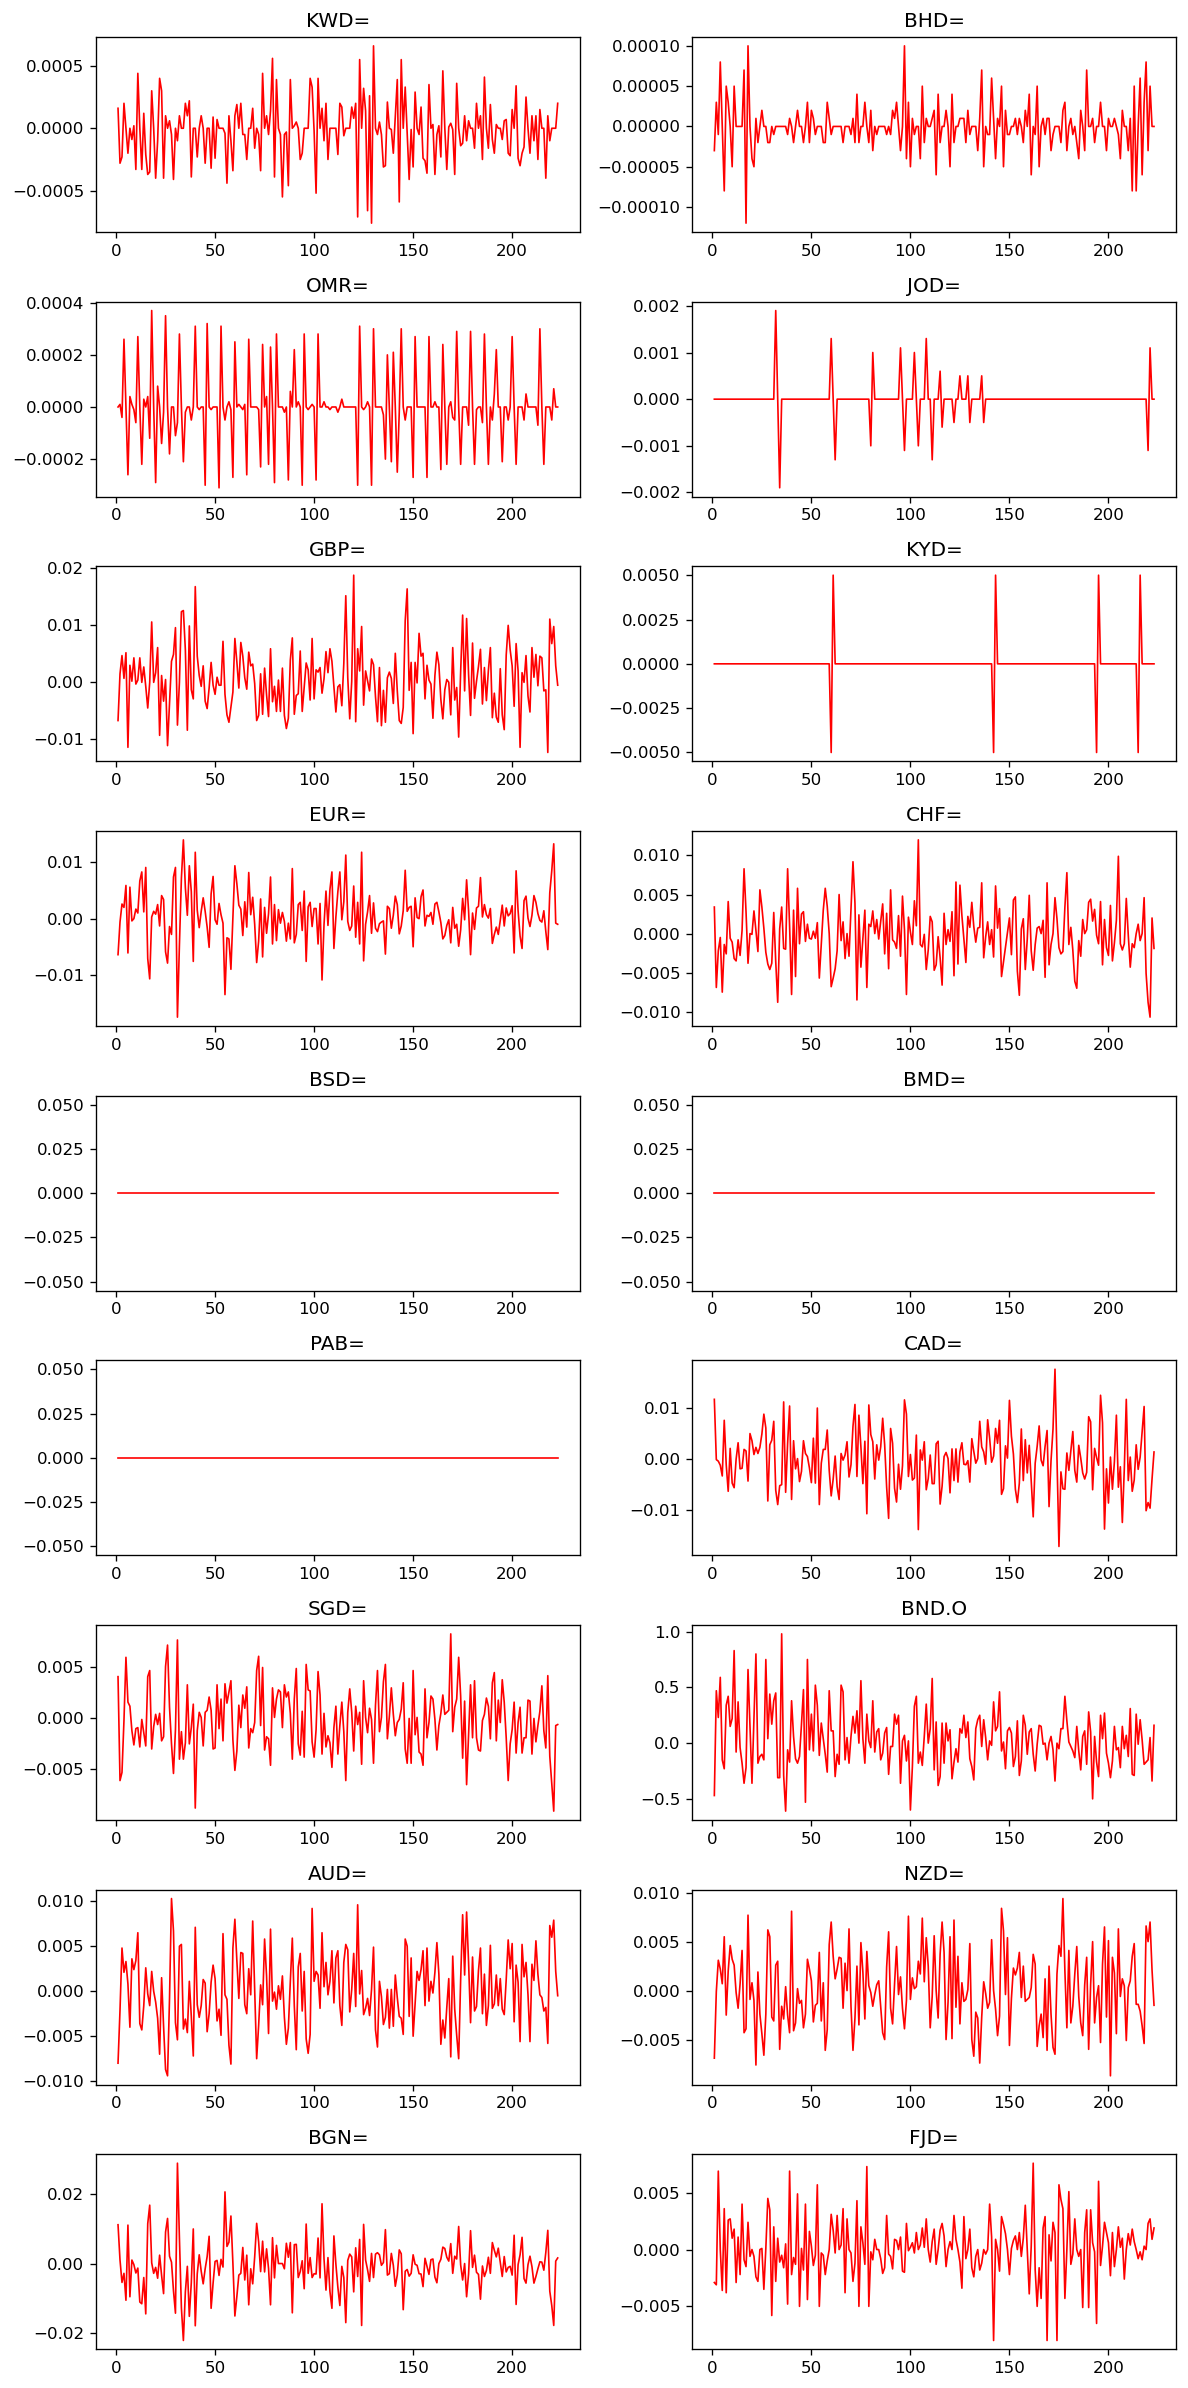

In [105]:
# just as a visual, we have subplotted all the currencies to see if it is stationary or not.
#And now they are all stationary after franposing them. 
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    d = project_transform[project_transform.columns[i]]
    ax.plot(d, color='red', linewidth=1)
# Decorations
    ax.set_title(project_transform.columns[i])
plt.tight_layout();
plt.savefig('StationaryTestFX.png')

In [73]:
# we will not take the data for the last 30 days for our examination 

project30= project[0:30]
project30

,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,BSD=,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,1.0,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,1.0,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,1.0,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,1.0,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,1.0,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
5,0.30550,0.37710,0.38528,0.71,1.3119,0.835,1.0889,0.9349,1.0,1.0,1.0,1.2570,1.3625,77.50,0.7453,0.6798,1.7959,0.4764,4.6932
6,0.30530,0.37702,0.38502,0.71,1.3004,0.835,1.0828,0.9335,1.0,1.0,1.0,1.2646,1.3641,77.27,0.7461,0.6853,1.8069,0.4800,4.6760
7,0.30530,0.37707,0.38506,0.71,1.3033,0.835,1.0884,0.9309,1.0,1.0,1.0,1.2635,1.3653,77.61,0.7421,0.6828,1.7974,0.4762,4.6969
8,0.30521,0.37710,0.38507,0.71,1.3034,0.835,1.0880,0.9350,1.0,1.0,1.0,1.2572,1.3641,78.03,0.7457,0.6848,1.7984,0.4788,4.6980
9,0.30523,0.37710,0.38506,0.71,1.3076,0.835,1.0880,0.9344,1.0,1.0,1.0,1.2593,1.3615,78.18,0.7481,0.6894,1.7981,0.4815,4.7534


In [155]:
#now we will add another column for the the constant plus the dates for the last 30 days 
project30.insert(0, "DATE", ['20.04.2022', '19.04.2022', '18.04.2022', '17.04.2022', '16.04.2022', '15.04.2022', '14.04.2022',
                            '13.04.2022', '12.04.2022', '11.04.2022', '10.04.2022', '09.04.2022', '08.04.2022', '07.04.2022', '06.04.2022', 
                            '05.04.2022', '04.04.2022', '03.04.2022', '02.04.2022', '01.04.2022', '31.03.2022', '30.03.2022', '29.03.2022', 
                             '28.03.2022','27.03.2022', '26.03.2022', '25.03.2022', '24.03.2022', '23.03.2022', '22.03.2022'])
project30.insert(1, "USD=", [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], True)
project30

,DATE,USD=,KWD=,BHD=,OMR=,JOD=,GBP=,KYD=,EUR=,CHF=,...,BMD=,PAB=,CAD=,SGD=,BND.O,AUD=,NZD=,BGN=,FJD=,BRL=
0,20.04.2022,1,0.30565,0.37703,0.38505,0.71,1.3070,0.835,1.0854,0.9486,...,1.0,1.0,1.2503,1.3640,76.83,0.7452,0.6808,1.8025,0.4791,4.6232
1,19.04.2022,1,0.30581,0.37700,0.38505,0.71,1.3002,0.835,1.0790,0.9520,...,1.0,1.0,1.2620,1.3681,76.36,0.7372,0.6739,1.8136,0.4762,4.6687
2,18.04.2022,1,0.30553,0.37703,0.38506,0.71,1.3016,0.835,1.0784,0.9451,...,1.0,1.0,1.2619,1.3620,76.83,0.7351,0.6738,1.8146,0.4731,4.6552
3,17.04.2022,1,0.30530,0.37702,0.38502,0.71,1.3062,0.835,1.0810,0.9429,...,1.0,1.0,1.2615,1.3567,77.06,0.7399,0.6769,1.8092,0.4800,4.6977
4,16.04.2022,1,0.30550,0.37710,0.38528,0.71,1.3068,0.835,1.0830,0.9424,...,1.0,1.0,1.2603,1.3565,77.65,0.7420,0.6791,1.8064,0.4800,4.7038
5,15.04.2022,1,0.30550,0.37710,0.38528,0.71,1.3119,0.835,1.0889,0.9349,...,1.0,1.0,1.2570,1.3625,77.50,0.7453,0.6798,1.7959,0.4764,4.6932
6,14.04.2022,1,0.30530,0.37702,0.38502,0.71,1.3004,0.835,1.0828,0.9335,...,1.0,1.0,1.2646,1.3641,77.27,0.7461,0.6853,1.8069,0.4800,4.6760
7,13.04.2022,1,0.30530,0.37707,0.38506,0.71,1.3033,0.835,1.0884,0.9309,...,1.0,1.0,1.2635,1.3653,77.61,0.7421,0.6828,1.7974,0.4762,4.6969
8,12.04.2022,1,0.30521,0.37710,0.38507,0.71,1.3034,0.835,1.0880,0.9350,...,1.0,1.0,1.2572,1.3641,78.03,0.7457,0.6848,1.7984,0.4788,4.6980
9,11.04.2022,1,0.30523,0.37710,0.38506,0.71,1.3076,0.835,1.0880,0.9344,...,1.0,1.0,1.2593,1.3615,78.18,0.7481,0.6894,1.7981,0.4815,4.7534


In [89]:
#now due for clean purposes, we have taken the clean data from out result because other currencies
#are constant and this model only works when the data is the not the same through the entire time series 

rics_14=  [ 'KWD=', 'BHD=', 'OMR=', 'GBP=', 'EUR=', 'CHF=', 'CAD=', 'SGD=', 'BND.O', 'AUD=', 'NZD=', 'BGN=', 'FJD=', 'BRL=' ]
rics_14

['KWD=',
 'BHD=',
 'OMR=',
 'GBP=',
 'EUR=',
 'CHF=',
 'CAD=',
 'SGD=',
 'BND.O',
 'AUD=',
 'NZD=',
 'BGN=',
 'FJD=',
 'BRL=']

In [106]:
# our last step is to use the granger causality test with each different pair of currencies. 

from statsmodels.tsa.stattools import grangercausalitytests

output=""
temp_rics = rics_14.copy();


loopStartVariable=0;
loopEndVariable=int(len(temp_rics))
for i in range(loopStartVariable, loopEndVariable ):
    column1=temp_rics.pop();
    temp=temp_rics.copy()
    xStart=0;
    xEnd=len(temp_rics);
    print( column1 )
    for x in range( xStart, xEnd ):
        print( column1, column2 )
        column2=temp.pop()
        output+=str(grangercausalitytests(project30[[column1,column2]], maxlag=[2]))
        
plt.savefig('grangercausalitytest.png')



BRL=
BRL= KWD=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4387  , p=0.6502  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=1.0681  , p=0.5862  , df=2
likelihood ratio test: chi2=1.0483  , p=0.5921  , df=2
parameter F test:         F=0.4387  , p=0.6502  , df_denom=23, df_num=2
BRL= FJD=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5234  , p=0.2392  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=3.7092  , p=0.1565  , df=2
likelihood ratio test: chi2=3.4833  , p=0.1752  , df=2
parameter F test:         F=1.5234  , p=0.2392  , df_denom=23, df_num=2
BRL= BGN=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4599  , p=0.2530  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=3.5546  , p=0.1691  , df=2
likelihood ratio test: chi2=3.3464  , p=0.1876  , df=2
parameter F test:         F=1.4599  , p=0.2530  , df_denom=23, df_num=2
BRL= NZD=

Granger Causality
number of lags (no zero) 2
ssr based

parameter F test:         F=0.9949  , p=0.3851  , df_denom=23, df_num=2
CHF= BHD=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4039  , p=0.6723  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=0.9835  , p=0.6116  , df=2
likelihood ratio test: chi2=0.9666  , p=0.6167  , df=2
parameter F test:         F=0.4039  , p=0.6723  , df_denom=23, df_num=2
EUR=
EUR= KWD=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3517  , p=0.7072  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=0.8562  , p=0.6517  , df=2
likelihood ratio test: chi2=0.8434  , p=0.6559  , df=2
parameter F test:         F=0.3517  , p=0.7072  , df_denom=23, df_num=2
EUR= GBP=

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1736  , p=0.8417  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=0.4226  , p=0.8095  , df=2
likelihood ratio test: chi2=0.4195  , p=0.8108  , df=2
parameter F test:         F=0.1736  , p=0.8417  , df_denom=23, df

<Figure size 432x288 with 0 Axes>